# **RISHABH MADANI**

## **Prediction Using Supervised ML**

### Problem Statement - Predict the percentage of an student based on the no. of study hours. <br> What will be predicted score if a student studies for 9.25 hrs/ day?

<hr>

## **Solution**
We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a ***Simple Linear Regression*** task as it involves just **two** variables.

We will be using the **Python Scikit-Learn** library for the task. Let's look at how the library can be used in machine learning to implement regression functions.

<hr>

#### Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### Importing the data

In [2]:
url = "http://bit.ly/w-data"
score_data = pd.read_csv(url)

print("Data imported successfully")
score_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print("Number of Rows = {}".format(score_data.shape[0]))
print("Number of Columns = {}".format(score_data.shape[1]))

Number of Rows = 25
Number of Columns = 2


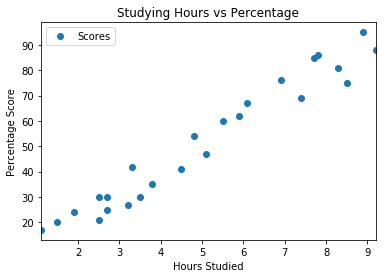

In [4]:
#Plotting Score Distribution
score_data.plot(x = 'Hours',y = 'Scores', style = 'o')
plt.title('Studying Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the above graph, we can see that there is a positive linear relation between the number of hours studied and the percentage of score.

<hr>

#### Preparing & Manipulating Data

##### Dividing the data into "attributes"(inputs) and "labels"(outputs)

In [5]:
x = score_data.iloc[:, :-1].values
y = score_data.iloc[:,1].values

##### Splitting this data into training data and test sets. This is achieved by using Scikit-Learn's built-in train_test_split() method

In [6]:
from sklearn.model_selection import train_test_split  
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state=0, stratify = None)

##### Implementing KNN Regressor /  Training Model
Now we will be training the algorithm

In [7]:
#Importing Linear Regressor
from sklearn.linear_model import LinearRegression as LR

# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)
print("Training complete.")

#Parameters of linear Regression
lr.coef_, lr.intercept_

Training complete.


(array([9.91065648]), 2.018160041434683)

##### Plotting the regression line

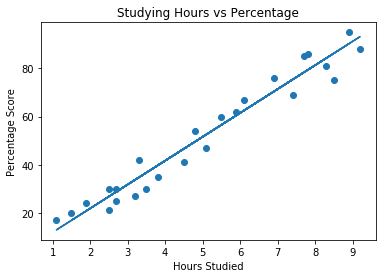

In [8]:
line = lr.coef_*x + lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.title('Studying Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

<hr>

#### Making Predictions & Evaluating the Model
Now that we have completed training the data, it's time to make some predictions. We also need to evaluate the performance of algorithm as it helps us compare how well different algorithms perform on a particular dataset. Here we will be using ***Mean Absolute Error*** for the same.

##### Predicting scores over the Training Data & Evaluating the Model

In [9]:
#Using Mean Absolute Error as an Evaluation Metric
from sklearn.metrics import mean_absolute_error as mae

train_predict = lr.predict(train_x)

k = mae(train_predict, train_y)
print('Training Mean Absolute Error : ', k)

Training Mean Absolute Error :  5.186601709180368


##### Predicting scores over the Testing Data & Evaluating the Model

In [10]:
test_predict = lr.predict(test_x)

k = mae(test_predict, test_y)
print('Testing Mean Absolute Error : ', k)

Testing Mean Absolute Error :  4.183859899002975


##### Comparing Actual Values vs Predicted Values

In [11]:
df = pd.DataFrame({'Actual': test_y, 'Predicted': test_predict})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### Predicted score if a student studies for 9.25 hrs/ day

In [12]:
hour = 9.25
score_pred = lr.predict([[hour]])
print("No of Hours Studied : {}".format(hour))
print("Predicted Score of Student : {}".format(score_pred[0]))

No of Hours Studied : 9.25
Predicted Score of Student : 93.69173248737538


<hr>

## Final Result

### The Mean Absolute Error over Training Data is 5.19
### The Mean Absolute Error over Testing Data is 4.18
### The Final Predicted Score for a Student who Studies for 9.25 hrs is 93.69 %